## PROJEKT 2  

### Ada Gąssowska

In [7]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import MuscleCommandline
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.Consensus import *

Jeden plik z wielu plików + nazwa zwierzęcia w description (do późniejszego rysowania)

In [8]:
files = ['C:/Users/Kuba/Downloads/dingo.fasta',
         'C:/Users/Kuba/Downloads/fox.fasta',
         'C:/Users/Kuba/Downloads/grizzly.fasta',
         'C:/Users/Kuba/Downloads/polar.fasta',
         'C:/Users/Kuba/Downloads/tiger.fasta',
         'C:/Users/Kuba/Downloads/hyena.fasta',
         'C:/Users/Kuba/Downloads/cheetah.fasta',
         'C:/Users/Kuba/Downloads/dog.fasta']
descriptions = ['dingo','fox', 'grizzly', 'polar', 'tiger', 'hyena', 'cheetah', 'dog']


In [9]:
output = []
for i in range(len(descriptions)):
    for record in SeqIO.parse(files[i], "fasta"):
        x = record
        x.description = descriptions[i] #zmiana opisu na nazwe zwierzecia
        output.append(x)
SeqIO.write(output, 'output.fasta', 'fasta') 
print('Liczba sekwencji')
print(len(output))

Liczba sekwencji
282803


# Klastrowanie

Klastrowanie programem usearch z wiersza poleceń



In [10]:
clusters_table = pd.read_table('C:/Users/Kuba/clusters.uc', header=None)
clusters_table = clusters_table[clusters_table[0]!='C'] #usuniecie rekordów z klastrami

In [11]:
#wyciaganie nazwy zwierzęcia (description zgodnie z poprzednim) i id
clusters_table['description'] = clusters_table[8].str.split(expand=True)[1]
clusters_table['id'] = clusters_table[8].str.split(expand=True)[0]
clusters_table = clusters_table[clusters_table[3]!='100.0'] #usunięcie sekwencji pokrywających się z centroidem (nie chcemy takich samych sekwencji)

In [12]:
clusters_table

,0,1,2,3,4,5,6,7,8,9,description,id
0,S,0,227,*,.,*,*,*,XP_035554824.1 dingo,*,dingo,XP_035554824.1
4,S,1,309,*,.,*,*,*,XP_035554724.1 dingo,*,dingo,XP_035554724.1
5,S,2,312,*,.,*,*,*,XP_035554655.1 dingo,*,dingo,XP_035554655.1
11,S,3,593,*,.,*,*,*,XP_035554646.1 dingo,*,dingo,XP_035554646.1
12,S,4,356,*,.,*,*,*,XP_035554621.1 dingo,*,dingo,XP_035554621.1
...,...,...,...,...,...,...,...,...,...,...,...,...
282798,H,25202,157,93.6,.,0,0,130I157M213I,CAA61809.1 dog,XP_025843500.1 fox,dog,CAA61809.1
282799,H,47152,60,96.7,.,0,0,I60M,prf||1201189A dog,XP_008700836.1 polar,dog,prf||1201189A
282800,S,51312,15,*,.,*,*,*,prf||0507223B dog,*,dog,prf||0507223B
282801,H,44069,117,99.1,.,0,0,117M,prf||754238A dog,prf||753699A dog,dog,prf||754238A


Szukamy klastrów w których znajdują się białka ze wszystkich organizmów, o wielkości 8 lub 9

In [13]:
tree_clusters_ids = [] #id klastrów z których można zrobić drzewa
for i in range(max(clusters_table[1])+1):
    cur_cluster = clusters_table[clusters_table[1]==i]
    if (len(cur_cluster)>=8 and len(cur_cluster)<10 and collections.Counter(np.unique(cur_cluster['description']))==collections.Counter(descriptions)):
        print(collections.Counter(cur_cluster['description']))
        tree_clusters_ids.append(i)
        
len(tree_clusters_ids)    

Counter({'dog': 2, 'dingo': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1, 'cheetah': 1, 'fox': 1, 'hyena': 1})
Counter({'dingo': 2, 'fox': 1, 'grizzly': 1, 'polar': 1, 'dog': 1, 'tiger': 1, 'cheetah': 1, 'hyena': 1})
Counter({'dog': 2, 'dingo': 1, 'fox': 1, 'tiger': 1, 'grizzly': 1, 'polar': 1, 'hyena': 1, 'cheetah': 1})
Counter({'dog': 2, 'dingo': 1, 'fox': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1, 'cheetah': 1, 'hyena': 1})
Counter({'dog': 2, 'dingo': 1, 'fox': 1, 'polar': 1, 'cheetah': 1, 'tiger': 1, 'hyena': 1, 'grizzly': 1})
Counter({'fox': 2, 'dingo': 1, 'grizzly': 1, 'polar': 1, 'hyena': 1, 'cheetah': 1, 'tiger': 1, 'dog': 1})
Counter({'dingo': 1, 'tiger': 1, 'grizzly': 1, 'polar': 1, 'hyena': 1, 'cheetah': 1, 'fox': 1, 'dog': 1})
Counter({'grizzly': 2, 'dingo': 1, 'cheetah': 1, 'fox': 1, 'polar': 1, 'tiger': 1, 'hyena': 1, 'dog': 1})
Counter({'dingo': 2, 'hyena': 1, 'cheetah': 1, 'fox': 1, 'tiger': 1, 'grizzly': 1, 'polar': 1, 'dog': 1})
Counter({'dog': 2, 'dingo': 1, 'grizzly': 1, '

Counter({'dog': 2, 'fox': 1, 'hyena': 1, 'tiger': 1, 'cheetah': 1, 'dingo': 1, 'grizzly': 1, 'polar': 1})
Counter({'dog': 2, 'fox': 1, 'grizzly': 1, 'cheetah': 1, 'dingo': 1, 'polar': 1, 'hyena': 1, 'tiger': 1})
Counter({'dog': 2, 'fox': 1, 'dingo': 1, 'grizzly': 1, 'polar': 1, 'cheetah': 1, 'hyena': 1, 'tiger': 1})
Counter({'hyena': 2, 'grizzly': 1, 'dog': 1, 'dingo': 1, 'fox': 1, 'tiger': 1, 'polar': 1, 'cheetah': 1})
Counter({'grizzly': 1, 'polar': 1, 'dingo': 1, 'dog': 1, 'fox': 1, 'tiger': 1, 'hyena': 1, 'cheetah': 1})
Counter({'grizzly': 1, 'polar': 1, 'tiger': 1, 'hyena': 1, 'dingo': 1, 'fox': 1, 'cheetah': 1, 'dog': 1})
Counter({'dog': 2, 'grizzly': 1, 'cheetah': 1, 'dingo': 1, 'tiger': 1, 'hyena': 1, 'fox': 1, 'polar': 1})
Counter({'dog': 2, 'grizzly': 1, 'tiger': 1, 'cheetah': 1, 'dingo': 1, 'fox': 1, 'polar': 1, 'hyena': 1})
Counter({'dog': 2, 'grizzly': 1, 'polar': 1, 'dingo': 1, 'fox': 1, 'hyena': 1, 'cheetah': 1, 'tiger': 1})
Counter({'dog': 2, 'grizzly': 1, 'fox': 1, 'po

Counter({'dog': 2, 'hyena': 1, 'dingo': 1, 'grizzly': 1, 'polar': 1, 'fox': 1, 'cheetah': 1, 'tiger': 1})
Counter({'dog': 2, 'hyena': 1, 'fox': 1, 'cheetah': 1, 'dingo': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1})
Counter({'fox': 2, 'hyena': 1, 'dingo': 1, 'dog': 1, 'tiger': 1, 'grizzly': 1, 'polar': 1, 'cheetah': 1})
Counter({'dog': 2, 'hyena': 1, 'dingo': 1, 'fox': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1, 'cheetah': 1})
Counter({'dog': 2, 'hyena': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1, 'cheetah': 1, 'fox': 1, 'dingo': 1})
Counter({'dog': 2, 'hyena': 1, 'dingo': 1, 'fox': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1, 'cheetah': 1})
Counter({'hyena': 1, 'dingo': 1, 'dog': 1, 'grizzly': 1, 'polar': 1, 'fox': 1, 'tiger': 1, 'cheetah': 1})
Counter({'dog': 2, 'hyena': 1, 'dingo': 1, 'grizzly': 1, 'polar': 1, 'fox': 1, 'tiger': 1, 'cheetah': 1})
Counter({'dog': 2, 'hyena': 1, 'grizzly': 1, 'dingo': 1, 'polar': 1, 'fox': 1, 'tiger': 1, 'cheetah': 1})
Counter({'dog': 2, 'hyena': 1, 'dingo': 1, 'fo

Counter({'dog': 2, 'hyena': 1, 'cheetah': 1, 'dingo': 1, 'fox': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1})
Counter({'dog': 2, 'hyena': 1, 'dingo': 1, 'fox': 1, 'grizzly': 1, 'polar': 1, 'tiger': 1, 'cheetah': 1})


242

In [14]:
clusters_table=clusters_table[clusters_table[1].isin(tree_clusters_ids)]
clusters_table #tylko intresujące nas rekordy
len(np.unique(clusters_table['id']))

2142

In [15]:
clusters_table = clusters_table.drop_duplicates([1,'description']) #usunięcie po jednym białku z klastrów wielkości 9

In [16]:
len(clusters_table) #zgadza się  -  242*8=1936

1936

In [17]:
#pobranie sekwencji z klastrów
clust_lists = {i : [] for i in tree_clusters_ids}
for record in SeqIO.parse('C:/Users/Kuba/Downloads/output.fasta', 'fasta'):
    if len(clusters_table[clusters_table['id']==record.id])>0:
        num = clusters_table[clusters_table['id']==record.id][1].iloc[0] #numer klastra
        animal = clusters_table[clusters_table['id']==record.id]['description'].iloc[0]
        record.name= animal
        record.id = animal
        record.description=animal
        clust_lists[num.astype(int)].append(SeqIO.SeqRecord(record.seq, id = animal))

In [18]:
clust_lists

{291: [SeqRecord(seq=Seq('MESPNQSTTQEFIFSAFPCSCGSSVSCFVPLLFIYTFIVFGNLVIITVVQLNAH...DLK'), id='dingo', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
  SeqRecord(seq=Seq('MESPNQSTTQEFIFSAFPCSWGSSVSCFVPLLFIYTFIVFGNLVIITVVQLNAH...DLK'), id='fox', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
  SeqRecord(seq=Seq('MESPNQSTTQEFIFSAFPYSWEGSVTCFVPLLFIYTFIVFGNLVIITVVPLNAH...ELK'), id='grizzly', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
  SeqRecord(seq=Seq('MESPNQSTTQEFIFSAFPYSWEGSVTCFVPLLFIYTFIVFGNLVIITVVPLNAH...ELK'), id='polar', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
  SeqRecord(seq=Seq('MESPNQSAAQEFIFSAFPYSWGSSVTCFIPLLFIYTFIVIGNLVIITVVQLNAP...DLK'), id='tiger', name='<unknown name>', description='<unknown description>', dbxrefs=[]),
  SeqRecord(seq=Seq('NLSAVTEFIFTGFPQLQDGGLLYFFPLLFIYTFIVIGNLMIFFAVRLDTRLHNP...HLT'), id='hyena', name='<unknown name>', description='<unknown des

In [19]:
#zapisywanie plików z klastrami
for i in tree_clusters_ids:
    SeqIO.write(clust_lists[i],f"C:/Users/Kuba/Downloads/clusts/{i}_clust.fasta", 'fasta')

## MSA i tworzenie drzew

#### MSA za pomocą programu muscle

In [20]:
for i in tree_clusters_ids:
    muscle_cline  = MuscleCommandline(r"C:/Users/Kuba/Downloads/muscle3.8.31_i86win32.exe", input=f"C:/Users/Kuba/Downloads/clusts/{i}_clust.fasta", out = f"C:/Users/Kuba/Downloads/clusts/{i}_clust.aln", clw=True)
    stdin, stdout = muscle_cline()

#### Tworzenie drzew

In [21]:
distance_calc = DistanceCalculator('identity')
tree_constructor = DistanceTreeConstructor()

In [22]:
trees = [None]*len(tree_clusters_ids)
for i in range(len(tree_clusters_ids)):
    trees[i] = tree_constructor.upgma(distance_calc.get_distance(AlignIO.read(open(f"C:/Users/Kuba/Downloads/clusts/{tree_clusters_ids[i]}_clust.aln"), format = 'clustal')))

In [23]:
#wszystkie drzewa
for i in range(len(trees)):
    print(i)
    print('\n')
    Phylo.draw_ascii(trees[i])

0


  ___________________________________________________________ hyena
 |
 |                                                                   , dog
 |                                                                  ,|
_|                                                                __|| dingo
 |                                                               |  |
 |                                                          _____|  |_ fox
 |                                                         |     |
 |                                                         |     |   , polar
 |_________________________________________________________|     |___|
                                                           |         | grizzly
                                                           |
                                                           |     _ cheetah
                                                           |____|
                                                             

                                                            __________ dog
                                         __________________|
                                        |                  |__________ polar
  ______________________________________|
 |                                      |                         ____ dingo
 |                                      |                       _|
 |                                      |______________________| |____ grizzly
_|                                                             |
 |                                                             |______ cheetah
 |
 |                                             ___ fox
 |____________________________________________|
                                              | __ hyena
                                              ||
                                               |__ tiger

207


  _______________________________________________________ tiger
 |
 |                                 

In [24]:
majority_tree = majority_consensus(trees, 0.3)

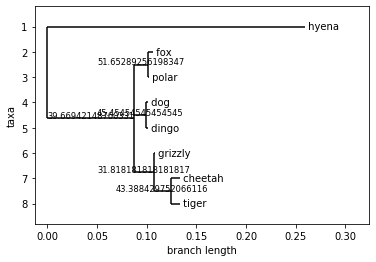

In [25]:
Phylo.draw(majority_tree)


In [26]:
Phylo.draw_ascii(majority_tree)

  ____________________________________________________________________ hyena
 |
 |                          _ fox
_|                       __|
 |                      |  | polar
 |                      |
 |                      |  , dog
 |______________________|__|
                        |  | dingo
                        |
                        |    , grizzly
                        |____|
                             |     _ cheetah
                             |____|
                                  |_ tiger



In [27]:
majority_tree_01 = majority_consensus(trees, 0.1)

In [28]:
Phylo.draw_ascii(majority_tree_01)

  ____________________________________________________________________ hyena
 |
 |                         , dog
_|                       __|
 |                      |  | dingo
 |                      |
 |______________________|            , grizzly
                        |        ____|
                        |       |    |     _ cheetah
                        |       |    |____|
                        |_______|         |_ tiger
                                |
                                |   _ fox
                                |__|
                                   | polar



In [29]:
majority_tree_05 = majority_consensus(trees, 0.5)

In [30]:
Phylo.draw_ascii(majority_tree_05)

  ____________________________________________________________________ hyena
 |
 | dog
 |
 | dingo
 |
_| grizzly
 |
 |_ cheetah
 |
 |_ tiger
 |
 |  , fox
 |__|
    | polar



In [31]:
majority_tree_07 = majority_consensus(trees, 0.7)

In [32]:
Phylo.draw_ascii(majority_tree_07)

  ____________________________________________________________________ hyena
 |
 | dog
 |
 | dingo
 |
 | fox
_|
 | polar
 |
 | grizzly
 |
 |_ cheetah
 |
 |_ tiger

